Домашнее задание - исследовать датасет задержек авиарейсов из Нью-Йорка в 2013 году.

Ссылка на датасет статистики авиарейсов: https://raw.githubusercontent.com/vaibhavwalvekar/NYC..

Замечание: в Нью-Йорке 3 аэропорта: 
John F. Kennedy International Airport (JFK)
LaGuardia Airport (LGA)
Newark International Airport (EWR) 

В отдельной таблице приведена статистика погоды за 2013 в аэропорту EWR (можно считать что погода во всех 3 аэропортах одинаковая):
https://github.com/vaibhavwalvekar/NYC-Flights-2013-D..

Ваша задача - предоставить отчет, раскрывающий характер и особенности задержек рейсов и способствующий принятию решений руководством аэропортов. 

Отчет должен быть оформлен в виде ноутбука с четкой структурой. Вначале в ячейке Markdown идет краткое описание исследуемого вопроса (что будем изучать), затем код и все его выводы (таблицы, графики, значения), после этого снова в ячейке Markdown ваш краткий вывод из полученного результата (о чем он говорит).

В отчете должно быть не менее 10 содержательных выводов, подтвержденных данными. Для разнообразия материала используйте не меньше 5 различных типов диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, цветовая схема и т.д.). 

Для решения задач используйте предпочтительно pandas.

Жду ваших PR.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
url1 ='https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
airports = pd.read_csv(url1, sep=',')
url2='https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
weather = pd.read_csv(url2, sep=',')
airports=airports.drop('Unnamed: 0',axis=1)
weather=weather.drop('Unnamed: 0',axis=1)
weather=weather.drop('origin',axis=1)


In [3]:
airports.head(8)


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0


In [4]:
weather.head(8)

,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0


In [5]:
airports=airports.merge(weather,how='inner')

In [6]:
airports.head(8)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1,1,600.0,0.0,851.0,-7.0,B6,N595JB,371,...,0.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,2013,1,1,600.0,0.0,837.0,12.0,MQ,N542MQ,4650,...,0.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,343,...,1.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,2013,1,1,602.0,-8.0,812.0,-8.0,DL,N971DL,1919,...,2.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,2013,1,1,602.0,-3.0,821.0,16.0,MQ,N730MQ,4401,...,2.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
5,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,1895,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,2013,1,1,606.0,-4.0,837.0,-8.0,DL,N3739P,1743,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
7,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,1077,...,7.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


In [7]:
airports.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

В этом эксперименте я рассмотрел связь между задержкой рейсов и месяцами.

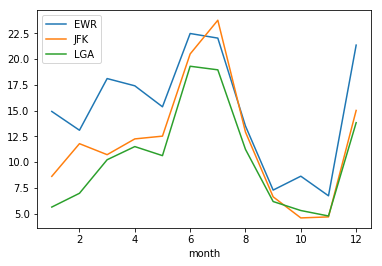

In [8]:
##Эксперимент 1
pl=airports.groupby(['origin','month'])['dep_delay'].mean()
plt.figure()
pl['EWR'].plot(label="EWR")
pl['JFK'].plot(label='JFK')
pl['LGA'].plot(label='LGA')
plt.legend(loc='best', fontsize=10)

Как итог выяснилось, что максимальная задержка достигается в летний промежуток времени независимо от айропорта.

Попробуем найти причину задержек самолётов летом связав её с какими-то параметрами.К примеру скорость ветра

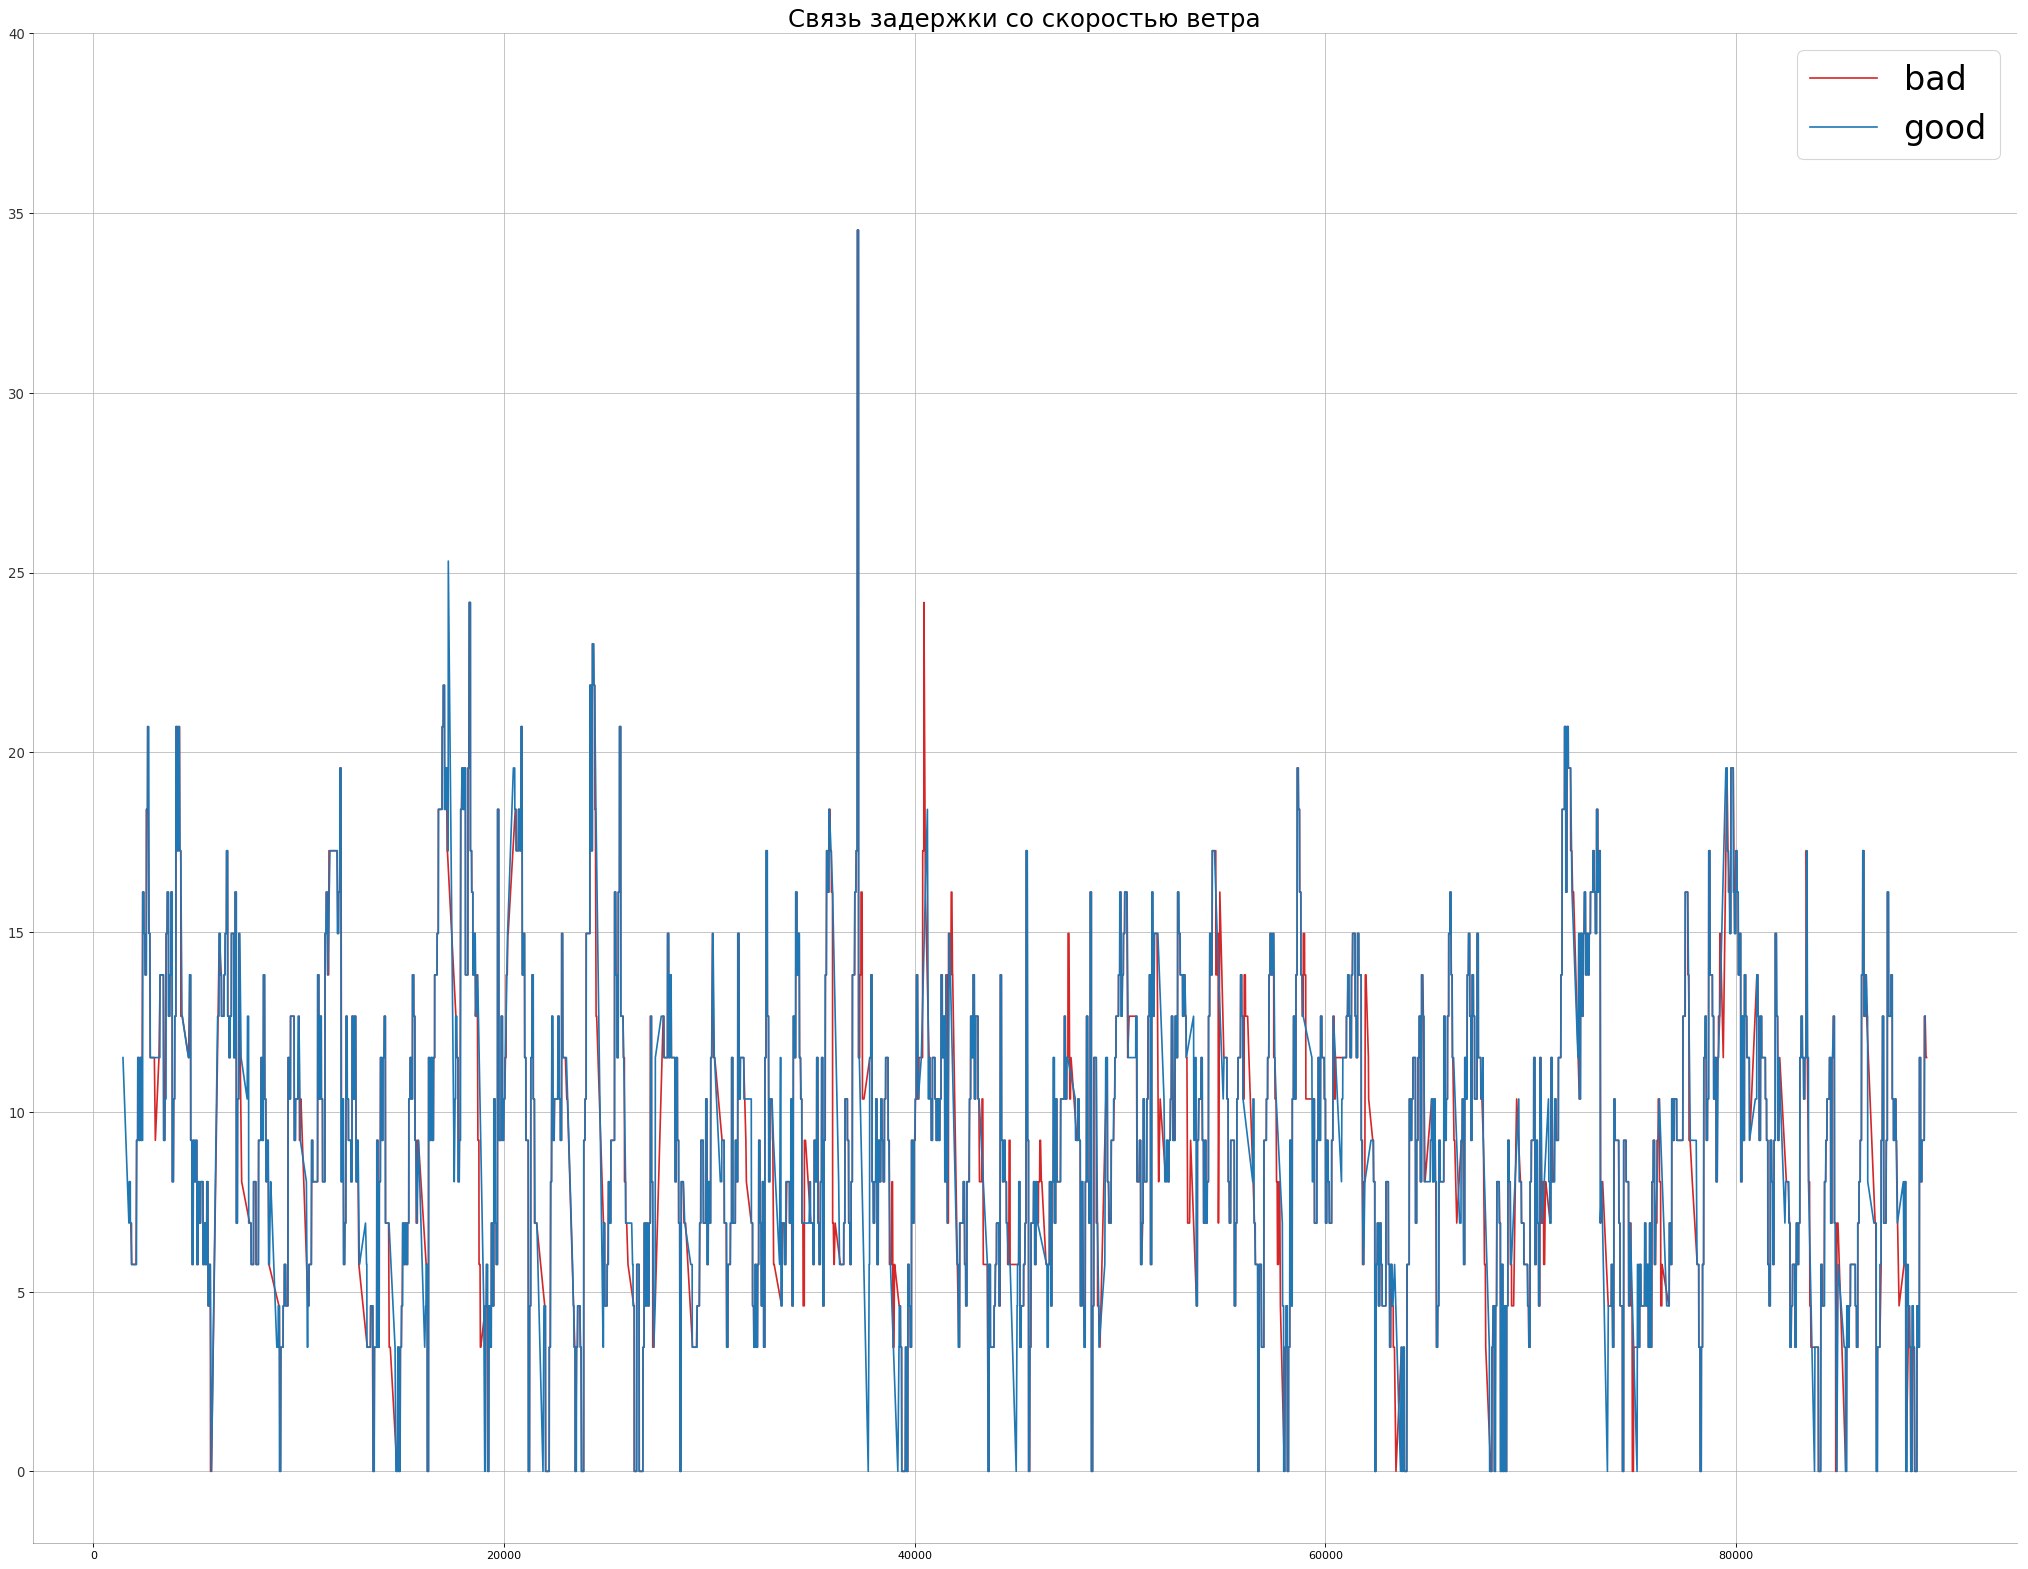

In [9]:
##Эксперимент
characteristic='wind_speed'
mean_dep_delay=airports.groupby('origin')['dep_delay'].mean().mean()
bad=airports[airports['dep_delay']>mean_dep_delay]
pieces=[bad[bad['month']==6],bad[bad['month']==7]]
bad=pd.concat(pieces)
bad=bad[['month','day','hour','minute',characteristic]]
bad['time series']=bad['minute']+bad['hour']*60+bad['day']*24*60+(bad['month']-6)*30*24*60
bad=bad[['time series',characteristic]]


good=airports[airports['dep_delay']<mean_dep_delay]
pieces=[good[good['month']==6],good[good['month']==7]]
good=pd.concat(pieces)
good=good[['month','day','hour','minute',characteristic]]
good['time series']=good['minute']+good['hour']*60+good['day']*24*60+(good['month']-6)*30*24*60
good=good[['time series',characteristic]]

# Draw Plot
plt.figure(figsize=(32,25), dpi= 80)
plt.plot('time series', characteristic,label='bad', data=bad, color='tab:red')
plt.plot('time series', characteristic,label='good', data=good, color='tab:blue')
# Decoration
plt.yticks(fontsize=12, alpha=0.8)
plt.title("Связь задержки со скоростью ветра", fontsize=22)
plt.grid(axis='both', alpha=.8)
plt.legend(loc='best', fontsize=30)
# Remove borders
plt.ylim(-2, 40)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

Как мы видим, летом задержка самолётов не связанна с переменами скорости ветра.(На графике приведены два типа рейсов: у которых задержка выше среднего и ниже.Ось X- это временной интервал.Видно, что у самолёт без задержке и с ней в целом почти совпадают показатели скорости ветра.)

Проверим вторую догадку. Попробуем обнаружить зависимость задержки от влажности.Если она есть, то будут участки, где есть только синие горы и нет красных или наоборт.Это покажет нам,что бывают моменты связанные с влажностью, влияющие на задержку

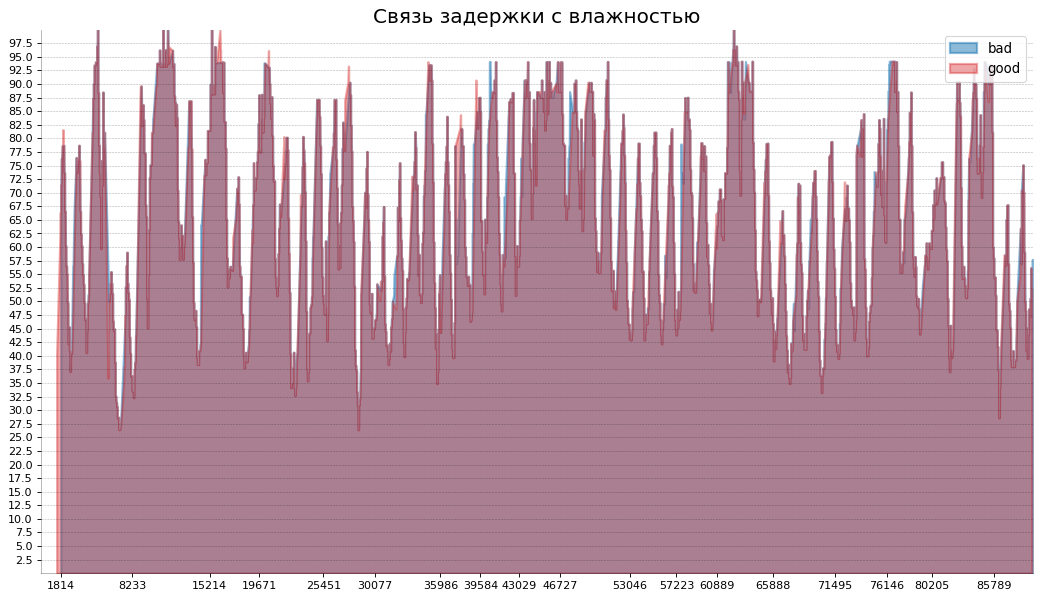

In [10]:
##Эксперимент
characteristic='humid'
mean_dep_delay=airports.groupby('origin')['dep_delay'].mean().mean()
bad=airports[airports['dep_delay']>mean_dep_delay]
pieces=[bad[bad['month']==6],bad[bad['month']==7]]
bad=pd.concat(pieces)
bad=bad[['month','day','hour','minute',characteristic]]
bad['time series']=bad['minute']+bad['hour']*60+bad['day']*24*60+(bad['month']-6)*30*24*60
bad=bad[['time series',characteristic]]


good=airports[airports['dep_delay']<mean_dep_delay]
pieces=[good[good['month']==6],good[good['month']==7]]
good=pd.concat(pieces)
good=good[['month','day','hour','minute',characteristic]]
good['time series']=good['minute']+good['hour']*60+good['day']*24*60+(good['month']-6)*30*24*60
good=good[['time series',characteristic]]

# Prepare Data
x1 = bad['time series'].values.tolist()
x2 = good['time series'].values.tolist()
y1 = bad[characteristic].values.tolist()
y2 = good[characteristic].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = [characteristic, characteristic]

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x1, y1=y1, y2=0, label='bad', alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x2, y1=y2, y2=0, label='good', alpha=0.4, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Связь задержки с влажностью', fontsize=18)
ax.set(ylim=[0, 100])
ax.legend(loc='best', fontsize=12)
plt.xticks(x1[::1000], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 100, 2.5), fontsize=10)
plt.xlim(-10, x1[-1])

# Draw Tick lines  
for y in np.arange(2.5, 100, 2.5):    
    plt.hlines(y, xmin=0, xmax=max(x1), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()



Мы ничего не обнаруживаем=(

Попробуем найти плохие самолёты, сравнив средние задержки.

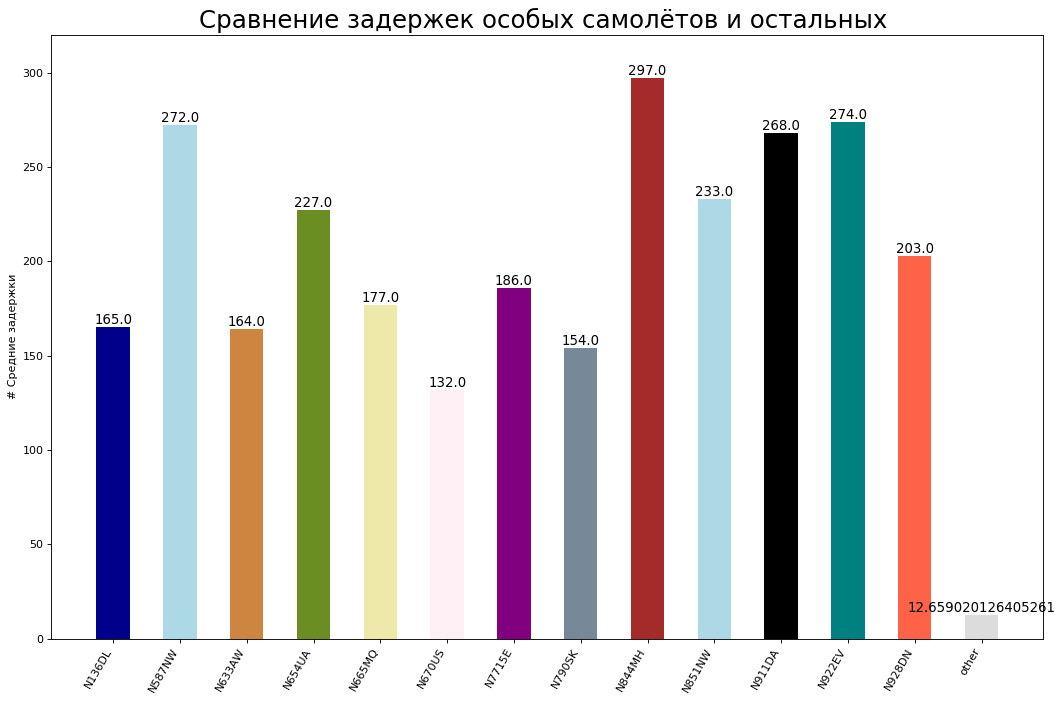

In [11]:
jet=airports.groupby('tailnum')['dep_delay'].mean().sort_values()[::-1]
jet_A=jet[:13]
other=jet[13:]
jet_A['other']=other.mean()

# Prepare Data
df = jet_A.groupby('tailnum').sum().reset_index(name='dep_delay')
n = df['tailnum'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['tailnum'], df['dep_delay'], color=c, width=.5)
for i, val in enumerate(df['dep_delay'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['tailnum'], rotation=60, horizontalalignment= 'right')
plt.title("Сравнение задержек особых самолётов и остальных ", fontsize=22)
plt.ylabel('# Средние задержки')
plt.ylim(0, 320)
plt.show()

Я своим умным взглядом, проанализировав даннные, выделил 13 самолётов с самыми большими средними задержками.Остальные самолёты сильно отличаются от данной выборки.

In [12]:
##Эксперимент 
airports.groupby('origin')['dep_delay'].mean()

origin
EWR    15.125397
JFK    12.124316
LGA    10.357386
Name: dep_delay, dtype: float64